Assignment 5: 



Please submit to ELMS
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integraty (collaboration and the use of online material).
Please sign your name here:Shubham Ramraja Takbhate

In [ ]:
# import the necessary packages
import numpy as np
import gzip, os
from urllib.request import urlretrieve
from random import random
from math import exp
from random import seed
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('using device:', device)

using device: cuda


# Part 1: Backpropagation in Neural Networks (20 Points)

#### Overview
Artificial Neural Networks are computational learning systems that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form. The concept of the artificial neural network was inspired by human biology and the way neurons of the human brain function together to understand inputs from human senses.

A simple neural network consists of Input Layer, Hidden Layer and Output Layer.
To train these the network, we will use Backpropagation algorithm.  Backpropagation is the cornerstone of modern neural networks. To understand the algorithm in details, here is a mathematical description in the Chapter 2 of *How the backpropagation algorithm works from Neural Networks and Deep Learning* (http://neuralnetworksanddeeplearning.com/chap2.html).

In this part, you are required to implement the following architecture and write training code of a neural network from scratch using the numpy library alone. 

Architecture Definition :

*   An Input Layer with the following 2-dimensions:
  *  0: Batch Size
  *  1: 784 = 28*28 pixels
* A hidden layer with 500 units
* A second hidden layer with 50 units
* An output layer with 10 units

There are five major steps to the implementation:

1. Define neural network: initialize_network()

2. Forward Propagation: pre_activation(), sigmoid_activation(), forward_propagation()

3. Backpropagation: backward_propagate_error()

4. Loss function and updation of weights (SGD): update_weights()

5. Training: train()


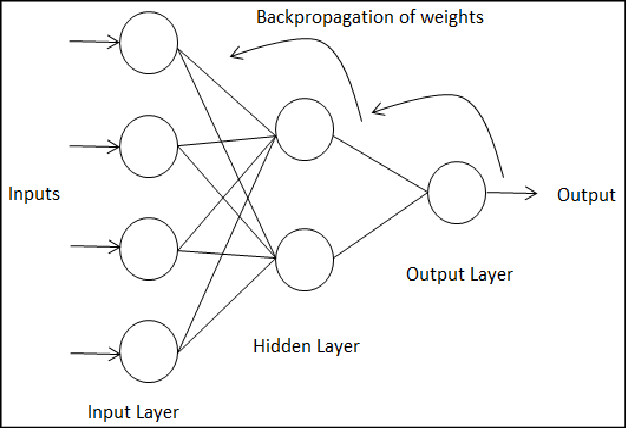



## Data

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 11SpETIc56PReKuaUKEwWDvdkiynyyGFA
!unzip "/content/MNISTArchive.zip" -d "/content/"
!gzip -d "/content/t10k-labels-idx1-ubyte.gz"
!gzip -d "/content/t10k-images-idx3-ubyte.gz" 
!gzip -d "/content/train-labels-idx1-ubyte.gz"
!gzip -d "/content/train-images-idx3-ubyte.gz"

A
A
Downloading...
From: https://drive.google.com/uc?id=11SpETIc56PReKuaUKEwWDvdkiynyyGFA
To: /content/MNISTArchive.zip
100% 11.6M/11.6M [00:00<00:00, 184MB/s]
Archive:  /content/MNISTArchive.zip
  inflating: /content/t10k-labels-idx1-ubyte.gz  
  inflating: /content/__MACOSX/._t10k-labels-idx1-ubyte.gz  
  inflating: /content/t10k-images-idx3-ubyte.gz  
  inflating: /content/__MACOSX/._t10k-images-idx3-ubyte.gz  
  inflating: /content/train-labels-idx1-ubyte.gz  
  inflating: /content/__MACOSX/._train-labels-idx1-ubyte.gz  
  inflating: /content/train-images-idx3-ubyte.gz  
  inflating: /content/__MACOSX/._train-images-idx3-ubyte.gz  


## Helper Functions:

### Code (10 pts)

In [ ]:
def read_mnist(path=None):
    r"""Return (train_images, train_labels, test_images, test_labels).

    Args:
        path (str): Directory containing MNIST. Default is
            /home/USER/data/mnist or C:\Users\USER\data\mnist.
            Create if nonexistant. Download any missing files.

    Returns:
        Tuple of (train_images, train_labels, test_images, test_labels), each
            a matrix. Rows are examples. Columns of images are pixel values.
            Columns of labels are a onehot encoding of the correct class.
    """
    url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz',
             'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz',
             't10k-labels-idx1-ubyte.gz']

    if path is None:
        # Set path to /home/USER/data/mnist or C:\Users\USER\data\mnist
        path = os.path.join(os.path.expanduser('~'), 'data', 'mnist')

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download any missing files
    for file in files:
        if file not in os.listdir(path):
            urlretrieve(url + file, os.path.join(path, file))
            print("Downloaded %s to %s" % (file, path))

    def _images(path):
        """Return images loaded locally."""
        with gzip.open(path) as f:
            # First 16 bytes are magic_number, n_imgs, n_rows, n_cols
            pixels = np.frombuffer(f.read(), 'B', offset=16)
        return pixels.reshape(-1, 784).astype('float32') / 255

    def _labels(path):
        """Return labels loaded locally."""
        with gzip.open(path) as f:
            # First 8 bytes are magic_number, n_labels
            integer_labels = np.frombuffer(f.read(), 'B', offset=8)

        def _onehot(integer_labels):
            """Return matrix whose rows are onehot encodings of integers."""
            n_rows = len(integer_labels)
            n_cols = integer_labels.max() + 1
            onehot = np.zeros((n_rows, n_cols), dtype='uint8')
            onehot[np.arange(n_rows), integer_labels] = 1
            return onehot

        return _onehot(integer_labels)

    train_images = _images(os.path.join(path, files[0]))
    train_labels = _labels(os.path.join(path, files[1]))
    test_images = _images(os.path.join(path, files[2]))
    test_labels = _labels(os.path.join(path, files[3]))

    return train_images, train_labels, test_images, test_labels

In [ ]:
#@title 
# Initialize a network
# def initialize_network(n_inputs, n_hidden, n_outputs):
# 	network = list()
	
# 	hidden_layer = None
# 	## Write your code. Initialize hidden layer here.
# 	network.append(hidden_layer)
 
# 	output_layer = None
# 	## Write your code. Initialize output_layer layer here. 
# 	network.append(output_layer)
# 	return network

In [ ]:
#@title 
# # Calculate neuron activation for an input
# def pre_activation(weights, inputs):
# 	activation = weights[-1]
# 	for i in range(len(weights)-1):
# 		## Write code here. compute activation: Wx+b
# 		print("")
	
# 	return activation

# def sigmoid_activation(activation):
# 	out_sigmoid=None
# 	## write code. implement sigmoid function
# 	return out_sigmoid
 
# # Calculate the derivative of a neuron output
# def sigmoid_derivative(output):
# 	## write code. implement sigmoid function
# 	out_sigmoid_deriv = None
# 	return out_sigmoid_deriv

In [ ]:
#@title 
# Forward Propagation:
# def forward_propagation(network, row):
# 	inputs = row
# 	for layer in network:

# 		new_inputs = []
# 		## write you code here.
# 		## for each hidden neuron this 'layer', compute \
# 		## pre_activation, sigmoid_activation and save then output in 'new_inputs.'

# 		inputs = new_inputs
# 	return inputs

# # Backpropagation:
# def backward_propagate_error(network, ground_truth):
# 	for i in reversed(range(len(network))):
# 		layer = network[i]
# 		errors = list()
# 		if i != len(network)-1:
# 			## write your code here.
# 			## compute error for all the hidden layer and append it to errors to keep track.
# 			print("error computed for hidden layer")
# 		else:
# 			## write your code here.
# 			## compute error for the output layer using ground_truth and append it to errors to keep track.			
# 			print("error computed for output layer")
	 
# 		for j in range(len(layer)):
# 			neuron = layer[j]
# 			neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output'])  
   
# # Stochastic GD for weight updation:
# def update_weights(network, row, l_rate):
# 	for i in range(len(network)):
# 		inputs = row[:-1]
# 		if i != 0:
# 			## write your code here.
# 			## pass activation i.e. neuron['output'] from previous layer as input to current layer 'i'			
# 			print('')
	 
# 		for neuron in network[i]:						
# 			for j in range(len(inputs)):
# 				## write you code here.
# 				## update the weights between each input and each neuron.
# 				print("")
		
# 			## write you code here.
# 			## update the bias vector
# 			print("")
	 
# # Train a network for a fixed number of epochs
# def train(network, train, l_rate, n_epoch, n_outputs):
# 	for epoch in range(n_epoch):
# 		sum_error = 0
# 		for row in train:
# 			outputs = forward_propagation(network, row)
# 			expected = [0 for i in range(n_outputs)]
# 			expected[row[-1]] = 1
# 			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
# 			backward_propagate_error(network, expected)
# 			update_weights(network, row, l_rate)
# 		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))      
	

In [ ]:
#@title 
# 1. Test your code for backprop algorithm on this sample dataset.
# seed(1)
# sample_dataset = [[2.7810836,2.550537003,0],
# 	[1.465489372,2.362125076,0],
# 	[3.396561688,4.400293529,0],
# 	[1.38807019,1.850220317,0],
# 	[3.06407232,3.005305973,0],
# 	[7.627531214,2.759262235,1],
# 	[5.332441248,2.088626775,1],
# 	[6.922596716,1.77106367,1],
# 	[8.675418651,-0.242068655,1],
# 	[7.673756466,3.508563011,1]]

# n_inputs = len(sample_dataset[0]) - 1
# n_outputs = len(set([sample[-1] for sample in sample_dataset]))
# network = initialize_network(n_inputs, 2, n_outputs)
# train(network, sample_dataset, l_rate=0.5, n_epoch=50, n_outputs=n_outputs)
# for layer in network:
# 	print(layer)

In [ ]:
# 2. Read MNIST data and test above algorithm on it.

# Read MNIST data
# train_images, train_labels, test_images, test_labels = read_mnist(path='/content/')
# print(train_images.shape, train_labels.shape)
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
# x_train, y_train, x_test, y_test = read_mnist(path='/content/')
# print(x_train.shape,y_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


1/5, error=0.031713
2/5, error=0.013191
3/5, error=0.011239
4/5, error=0.009916
5/5, error=0.008828


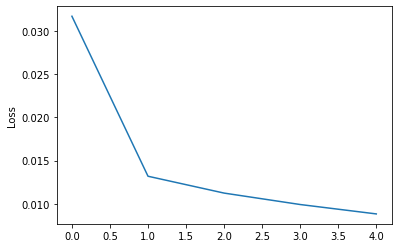

Accuracy_train : 94.48333333333333
mse_train: 0.0086
Accuracy_test : 94.17
mse_test: 0.0089


In [ ]:
class initialize_network:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        

        #w = np.random.randn(n) * sqrt(2.0/n)
        # Ref https://cs231n.github.io/neural-networks-2/
        self.w = np.random.randn(input_size, output_size)*np.sqrt(2/input_size)
        self.b = np.random.randn(1, output_size)*np.sqrt(2/input_size)
    def forward(self, input): 
        self.input = input
        return np.dot(input, self.w) + self.b

    def backward(self, output_error, lr):
        input_error = np.dot(output_error, self.w.T)
        weights_error = np.dot(self.input.T, output_error)
       # gradient descent
        self.w -= lr * weights_error
        self.b -= lr * output_error
        return input_error 


class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, lr):
        return output_error * self.activation_prime(self.input)  

class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, lr):
        return np.reshape(output_error, self.input_shape)       

class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)  

        
#Try different activation functions

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return np.exp(-x) / (1 + np.exp(-x))**2
def relu(x):
    return np.maximum(x, 0)
def relu_prime(x):
    return np.array(x >= 0).astype('int')    

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

from keras.utils import np_utils
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train
y_train = y_train

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)      
#Given Architecture 
network = [
    FlattenLayer(input_shape=(28, 28)),
    initialize_network(28 * 28, 500),
    ActivationLayer(sigmoid_activation,sigmoid_derivative),
    initialize_network(500, 50),
    ActivationLayer(sigmoid_activation, sigmoid_derivative),
    initialize_network(50, 10),
    SoftmaxLayer(10)
]




epochs = 5
learning_rate = 0.1
e=[]
# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # Error for display
        error += mse(y_true, output)

        # Output or prediction error
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))
    e.append(error)

import matplotlib.pyplot as plt
plt.plot(e)
plt.ylabel('Loss')
plt.show()

def test(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

accuracy= sum([np.argmax(y) == np.argmax(test(network, x)) for x, y in zip(x_train, y_train)]) / len(x_train)
error = sum([mse(y, test(network, x)) for x, y in zip(x_train, y_train)]) / len(x_train)
print("Accuracy_train :",accuracy*100)
print('mse_train: %.4f' % error)    

accuracy= sum([np.argmax(y) == np.argmax(test(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, test(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print("Accuracy_test :",accuracy*100)
print('mse_test: %.4f' % error)  

1/40, error=0.012129
2/40, error=0.006012
3/40, error=0.004471
4/40, error=0.003591
5/40, error=0.002958
6/40, error=0.002549
7/40, error=0.002166
8/40, error=0.001887
9/40, error=0.001654
10/40, error=0.001462
11/40, error=0.001324
12/40, error=0.001197
13/40, error=0.001078
14/40, error=0.001013
15/40, error=0.000931
16/40, error=0.000851
17/40, error=0.000795
18/40, error=0.000739
19/40, error=0.000658
20/40, error=0.000625
21/40, error=0.000590
22/40, error=0.000572
23/40, error=0.000541
24/40, error=0.000524
25/40, error=0.000494
26/40, error=0.000480
27/40, error=0.000461
28/40, error=0.000451
29/40, error=0.000435
30/40, error=0.000414
31/40, error=0.000403
32/40, error=0.000395
33/40, error=0.000380
34/40, error=0.000371
35/40, error=0.000369
36/40, error=0.000362
37/40, error=0.000362
38/40, error=0.000356
39/40, error=0.000357
40/40, error=0.000350


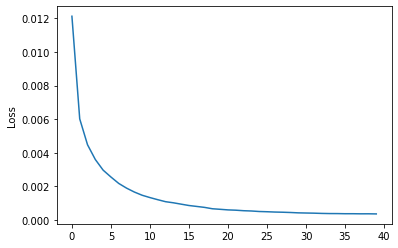

Accuracy_train : 99.80333333333333
mse_train: 0.0004
Accuracy_test : 97.98
mse_test: 0.0031


In [ ]:
class initialize_network:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        

        #w = np.random.randn(n) * sqrt(2.0/n)
        # Ref https://cs231n.github.io/neural-networks-2/
        self.w = np.random.randn(input_size, output_size)*np.sqrt(2/input_size)
        self.b = np.random.randn(1, output_size)*np.sqrt(2/input_size)
    def forward(self, input): 
        self.input = input
        return np.dot(input, self.w) + self.b

    def backward(self, output_error, lr):
        input_error = np.dot(output_error, self.w.T)
        weights_error = np.dot(self.input.T, output_error)
       # gradient descent
        self.w -= lr * weights_error
        self.b -= lr * output_error
        return input_error 


class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, lr):
        return output_error * self.activation_prime(self.input)  

class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, lr):
        return np.reshape(output_error, self.input_shape)       

class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)  

        
#Try different activation functions

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return np.exp(-x) / (1 + np.exp(-x))**2
def relu(x):
    return np.maximum(x, 0)
def relu_prime(x):
    return np.array(x >= 0).astype('int')    

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

from keras.utils import np_utils
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train
y_train = y_train

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)      
network = [
    FlattenLayer(input_shape=(28, 28)),
    initialize_network(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    initialize_network(128, 10),
    SoftmaxLayer(10)
]
epochs = 40
learning_rate = 0.1
e=[]
# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # Error for display
        error += mse(y_true, output)

        # Output or prediction error
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))
    e.append(error)

import matplotlib.pyplot as plt
plt.plot(e)
plt.ylabel('Loss')
plt.show()

def test(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

accuracy= sum([np.argmax(y) == np.argmax(test(network, x)) for x, y in zip(x_train, y_train)]) / len(x_train)
error = sum([mse(y, test(network, x)) for x, y in zip(x_train, y_train)]) / len(x_train)
print("Accuracy_train :",accuracy*100)
print('mse_train: %.4f' % error)    

accuracy= sum([np.argmax(y) == np.argmax(test(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, test(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print("Accuracy_test :",accuracy*100)
print('mse_test: %.4f' % error)  

### Write-up (10 pts)

1. You are required to report a) train error w.r.t epoch, b) train and test accuracy numbers on MNIST dataset at the end of training.
2. Experiment with different number of a) hidden layers b) training epochs and report the ablation study.

* If the layers are reduced there is increase in the accuracy.More epochs tend to give more accuracy. Relu function is better than sigmoid.

# Part 2: Training an Image Classifier




##Overview
CIFAR10 dataset will be used to train an image classifier.

![](https://miro.medium.com/max/578/1*BCsHErqOJxmKDLQXYJR_ow.png)



##Data
Using `torchvision`, it’s extremely easy to load `CIFAR10`.

In [ ]:
## The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


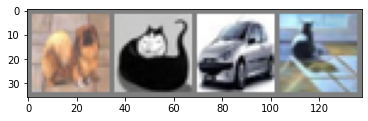

dog   cat   car   cat  


In [ ]:
## Let us show some of the training images, for fun.

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##Code (20 pts)

###Define a Convolutional Neural Network (10 pt)

Create a neural network that take 3-channel images. It should go as Conv2d --> ReLU --> MaxPool2d --> Conv2d --> ReLU --> MaxPool2d --> Flatten --> Linear --> ReLU --> Linear --> ReLU --> Linear

In [30]:

# Conv2d --> ReLU --> MaxPool2d --> Conv2d --> ReLU --> MaxPool2d --> Flatten --> Linear --> ReLU --> Linear --> ReLU --> Linear
class My_Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## TODO: Add layers to your neural net.
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        ## TODO: run forward pass as mentioned above.
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
net= My_Net()








###Define a Loss function and optimizer (5 pt)

Let’s use a Classification Cross-Entropy loss and SGD with momentum. (Feel free to experiment with other loss functions and optimizers to observe differences)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)
correct=0
total=0
train_accu=[]
train_losses=[]

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
       
        inputs=inputs.to(device)
        labels=labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    
    

        _,predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
       
    train_loss=running_loss/len(trainloader)
    accu=100.*correct/total
   
    train_accu.append(accu)
    train_losses.append(train_loss)   
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))
    

print('Finished Training')

cuda:0
Train Loss: 1.544 | Accuracy: 43.614
Train Loss: 1.312 | Accuracy: 48.442
Train Loss: 1.197 | Accuracy: 51.420
Train Loss: 1.116 | Accuracy: 53.677
Train Loss: 1.049 | Accuracy: 55.503
Train Loss: 0.998 | Accuracy: 57.018
Train Loss: 0.952 | Accuracy: 58.350
Train Loss: 0.913 | Accuracy: 59.515
Train Loss: 0.877 | Accuracy: 60.566
Train Loss: 0.852 | Accuracy: 61.501
Finished Training


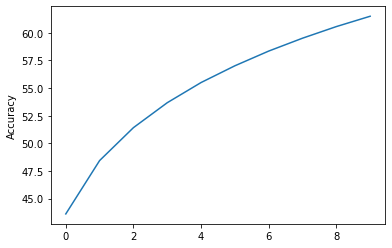

In [34]:
plt.plot(train_accu)
plt.ylabel('Accuracy')
plt.show()

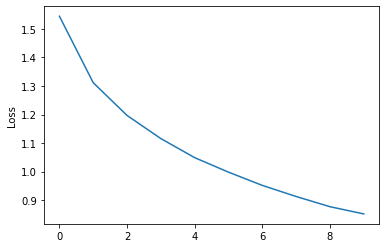

In [35]:
plt.plot(train_losses)
plt.ylabel('Loss')
plt.show()

###Train the network (5 pts)

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

###Test the network on the test data
We have trained the network over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.


In [38]:


# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images.to(device)
        labels=labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 74.1 %
Accuracy for class: car   is 73.1 %
Accuracy for class: bird  is 56.4 %
Accuracy for class: cat   is 34.5 %
Accuracy for class: deer  is 52.7 %
Accuracy for class: dog   is 50.2 %
Accuracy for class: frog  is 71.2 %
Accuracy for class: horse is 58.5 %
Accuracy for class: ship  is 82.3 %
Accuracy for class: truck is 53.0 %


In [39]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images.to(device)
        labels=labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 60.60%


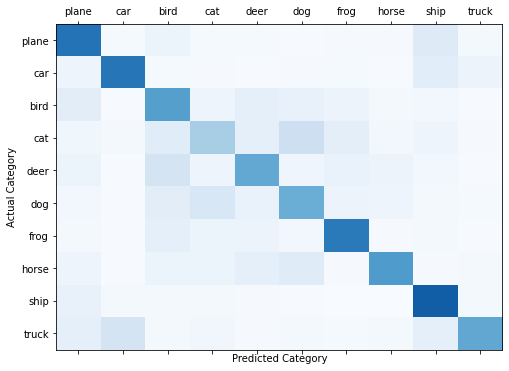

In [40]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

## Write-up (5 pt)
(1 pt) Show plot for loss over epochs.

(1 pt) Show plot for accuracy over epochs.

(3 pt) Show confusion matrix on test data.

## Extra Credits (5 pt)
Run VGG with pre-trained weights in this [colab](https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_vgg.ipynb#scrollTo=daily-wayne). Test any two images of your choice to your model and to VGG model and show accuracy (images must include objects from CIFAR10 classes). Discuss which model performs better and why.

In [48]:
# Download ImageNet labels
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19_bn', pretrained=True)
model.eval()




Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

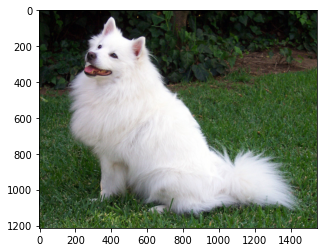

In [66]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)

from google.colab.patches import cv2_imshow
plt.imshow(input_image)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [67]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


--2022-12-11 05:47:43--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-12-11 05:47:43 (106 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]



In [68]:

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.6624820232391357
Pomeranian 0.1707356721162796
white wolf 0.02664555050432682
keeshond 0.020220434293150902
collie 0.01654365099966526


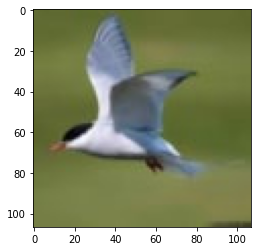

In [70]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
from PIL import Image
from torchvision import transforms
input_image = Image.open('/content/Cub200Dataset.jpg')

from google.colab.patches import cv2_imshow
plt.imshow(input_image)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [71]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

red-breasted merganser 0.35959166288375854
English foxhound 0.08388033509254456
black stork 0.050981972366571426
water ouzel 0.043925072997808456
albatross 0.04366683214902878


Here we can see that VGG16 is accurate. This network is capable of finding the breed of the dog. Furthermore, it is able to tell about the kind of bird.

# Part 3: Semantic Segmentation

## Overview
Semantic Segmentation is an image analysis task in which we classify each pixel in the image into a class.
So, let's say we have the following image.

![](https://lh3.googleusercontent.com/-ELUnFgFJqUU/XPPXOOmhfMI/AAAAAAAAAP0/2cabsTI9uGUYxM3O3w4EOxjR_iJvEQAvACK8BGAs/s374/index3.png)

And then given the above image its semantically segmentated image would be the following

![](https://lh3.googleusercontent.com/-gdUavPeOxdg/XPPXQngAnvI/AAAAAAAAAQA/yoksBterCGQGt-lv3aX4kfyMUDXTar7yACK8BGAs/s374/index4.png)

As you can see, that each pixel in the image is classified to its respective class.


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
#@title 
# import os 
# import tarfile
# import shutil
# import urllib.request

# url='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
# path='VOC'
# def get_archive(path,url):
#   try:
#     os.mkdir(path)
#   except:
#     path=path
  
#   filename='devkit'
#   urllib.request.urlretrieve(url,f"{path}/{filename}.tar")
 
# get_archive(path,url)
# def extract(path):
#   tar_file=tarfile.open(f"{path}/devkit.tar")
#   tar_file.extractall('./')
#   tar_file.close()
#   shutil.rmtree(path)

# extract(path)

## Helper Functions

In [ ]:
#@title 

# from PIL import Image
# import matplotlib.pyplot as plt
# import torch
# from torchvision import models
# import torchvision.transforms as T
# import numpy as np

# """Various RGB palettes for coloring segmentation labels."""
# VOC_CLASSES = [
#     "background",
#     "aeroplane",
#     "bicycle",
#     "bird",
#     "boat",
#     "bottle",
#     "bus",
#     "car",
#     "cat",
#     "chair",
#     "cow",
#     "diningtable",
#     "dog",
#     "horse",
#     "motorbike",
#     "person",
#     "potted plant",
#     "sheep",
#     "sofa",
#     "train",
#     "tv/monitor",
# ]


# VOC_COLORMAP = [
#     [0, 0, 0],
#     [128, 0, 0],
#     [0, 128, 0],
#     [128, 128, 0],
#     [0, 0, 128],
#     [128, 0, 128],
#     [0, 128, 128],
#     [128, 128, 128],
#     [64, 0, 0],
#     [192, 0, 0],
#     [64, 128, 0],
#     [192, 128, 0],
#     [64, 0, 128],
#     [192, 0, 128],
#     [64, 128, 128],
#     [192, 128, 128],
#     [0, 64, 0],
#     [128, 64, 0],
#     [0, 192, 0],
#     [128, 192, 0],
#     [0, 64, 128],
# ]

## Code (25 pt)

### 1. Implement Data Loader for training and validation (5 pt)

In [ ]:
#@title 
# import os 
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# import cv2 


# # You can modify this class 
# class VocDataset(Dataset):
#   def __init__(self, dir, color_map):
#     self.root=os.path.join(dir,'VOCdevkit/VOC2007')
#     self.target_dir=os.path.join(self.root,'SegmentationClass')
#     self.images_dir=os.path.join(self.root,'JPEGImages')
#     file_list = os.path.join(self.root,'ImageSets/Segmentation/trainval.txt')
#     self.files = [line.rstrip() for line in tuple(open(file_list, "r"))]
#     self.color_map=color_map

#   def convert_to_segmentation_mask(self,mask):
#     # This function converts color channels of semgentation masks to number of classes
#     # Semantic Segmentation requires a segmentation mask to be a NumPy array with the shape
#     # This part is implemented for displaying colorized results in subpart 3
#     # YOUR CODE HERE:

#     height, width = mask.shape[:2]
#     segmentation_mask = np.zeros((height, width, len(self.color_map)), dtype=np.float32)
#     for label_index, label in enumerate(self.color_map):
#           segmentation_mask[:, :, label_index] = np.all(mask == label, axis=-1).astype(float)
#     return segmentation_mask
  

#   def __getitem__(self,index):
#     # YOUR CODE HERE:
#     image_id=self.files[index]
#     image_path=os.path.join(self.images_dir,f"{image_id}.jpg")
#     label_path=os.path.join(self.target_dir,f"{image_id}.png")
#     image=cv2.imread(image_path)
#     image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     image=cv2.resize(image,(256,256))
#     image=torch.tensor(image).float()
#     label=cv2.imread(label_path)
#     label=cv2.cvtColor(label,cv2.COLOR_BGR2RGB)
#     label=cv2.resize(label,(256,256))
#     label = self.convert_to_segmentation_mask(label)
#     label=torch.tensor(label).float()
#     return image, label
#   def __len__(self):
#     return len(self.files)  
# data=VocDataset('/content',VOC_COLORMAP)

# data.__len__()
       





In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-0tuqxa6v
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-0tuqxa6v
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 376 kB 8.9 MB/s 
     |████████████████████████████████| 58 kB 7.7 MB/s 
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.1-py3-none-any.whl size=102071 sha256=d8b2f5896c1545c2c348c5ef7f28d67e119b176721375a8017218de9495fa20e
  Stored in directory: /tmp/pip-ephem-wheel-cache-7c_hy5o4/wheels/5b/bd/df/041378eb4d7881115c6dcdf2ca35ddcb188441321e8a887618
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=544288edc070d6f3bc1991

In [41]:
%pip install poutyne    # Installing the Poutyne library

%pip install segmentation-models-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 27.0 MB/s 
     |████████████████████████████████| 512 kB 63.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 12.7 MB/s 
     |████████████████████████████████| 376 kB 55.2 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=9abec01fd2f999089f8c431f65a00948d54a6062139fcd10b5ba0379718a4c76
  Stored in directory: /root/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=10b300ee7e0ed1c7374d6479500b4e594638e1f1393e9462b508d08c1ed948ab
  Stored in directory: /root/.cache/pip/wheels/ed/fa/b9/5c8

The current processor is ... cuda


  0%|          | 0/460032000 [00:00<?, ?it/s]

Extracting ./datasets/VOCtrainval_06-Nov-2007.tar to ./datasets/
Using downloaded and verified file: ./datasets/VOCtrainval_06-Nov-2007.tar
Extracting ./datasets/VOCtrainval_06-Nov-2007.tar to ./datasets/


  0%|          | 0/451020800 [00:00<?, ?it/s]

Extracting ./data/VOC/VOCtest_06-Nov-2007.tar to ./data/VOC/


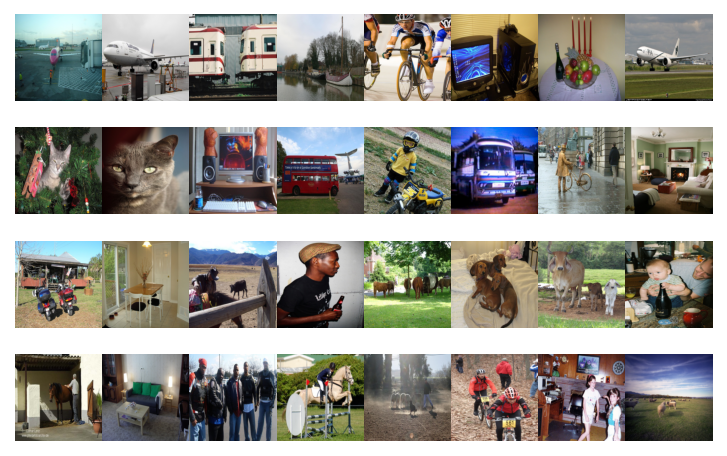

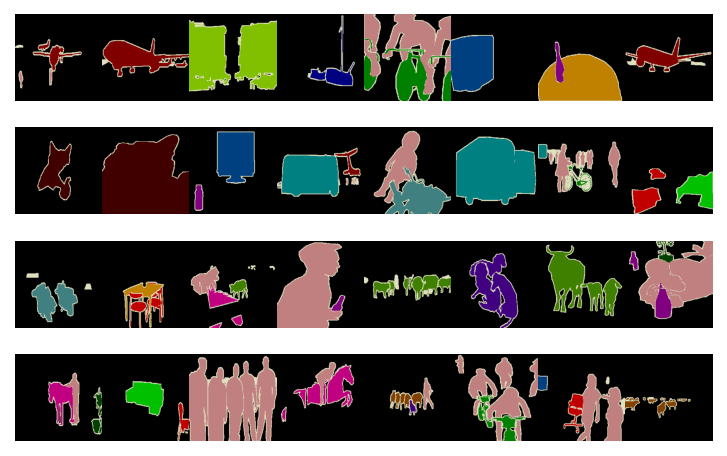

In [42]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.transforms.functional import InterpolationMode
import segmentation_models_pytorch as smp
import torchmetrics
from poutyne import Model, ModelCheckpoint, CSVLogger, set_seeds
from torch.utils.data import DataLoader
from PIL import Image
def replace_tensor_value_(tensor, a, b):
    tensor[tensor == a] = b
    return tensor


def plot_images(images, num_per_row=8, title=None):
    num_rows = int(math.ceil(len(images) / num_per_row))

    fig, axes = plt.subplots(num_rows, num_per_row, dpi=150)
    fig.subplots_adjust(wspace=0, hspace=0)

    for image, ax in zip(images, axes.flat):
        ax.imshow(image)
        ax.axis('off')

    return fig


# Color palette for segmentation masks
PALETTE = np.array(
    [
        [0, 0, 0],
        [128, 0, 0],
        [0, 128, 0],
        [128, 128, 0],
        [0, 0, 128],
        [128, 0, 128],
        [0, 128, 128],
        [128, 128, 128],
        [64, 0, 0],
        [192, 0, 0],
        [64, 128, 0],
        [192, 128, 0],
        [64, 0, 128],
        [192, 0, 128],
        [64, 128, 128],
        [192, 128, 128],
        [0, 64, 0],
        [128, 64, 0],
        [0, 192, 0],
        [128, 192, 0],
        [0, 64, 128],
    ]
    + [[0, 0, 0] for i in range(256 - 22)]
    + [[255, 255, 255]],
    dtype=np.uint8,
)


def array1d_to_pil_image(array):
    pil_out = Image.fromarray(array.astype(np.uint8), mode='P')
    pil_out.putpalette(PALETTE)
    return pil_out
learning_rate = 0.0005
batch_size = 32
image_size = 224
num_epochs = 70
imagenet_mean = [0.485, 0.456, 0.406]  # mean of the imagenet dataset for normalizing
imagenet_std = [0.229, 0.224, 0.225]  # std of the imagenet dataset for normalizing
set_seeds(43)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('The current processor is ...', device)
input_resize = transforms.Resize((224, 224))
input_transform = transforms.Compose(
    [
        input_resize,
        transforms.ToTensor(),
        transforms.Normalize(imagenet_mean, imagenet_std),
    ]
)

target_resize = transforms.Resize((224, 224), interpolation=InterpolationMode.NEAREST)
target_transform = transforms.Compose(
    [
        target_resize,
        transforms.PILToTensor(),
        transforms.Lambda(lambda x: replace_tensor_value_(x.squeeze(0).long(), 255, 21)),
    ]
)

# Creating the dataset
train_dataset = datasets.VOCSegmentation(
    './datasets/',
    year='2007',
    download=True,
    image_set='train',
    transform=input_transform,
    target_transform=target_transform,
)
valid_dataset = datasets.VOCSegmentation(
    './datasets/',
    year='2007',
    download=True,
    image_set='val',
    transform=input_transform,
    target_transform=target_transform,
)
test_dataset = datasets.VOCSegmentation(
    './data/VOC/',
    year='2007',
    download=True,
    image_set='test',
    transform=input_transform,
    target_transform=target_transform,
)

# Creating the dataloader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
train_dataset_viz = datasets.VOCSegmentation(
    './datasets/',
    year='2007',
    image_set='train',
    transform=input_resize,
    target_transform=target_resize,
)
inputs, ground_truths = map(list, zip(*[train_dataset_viz[i] for i in range(batch_size)]))
_ = plot_images(inputs)
_ = plot_images(ground_truths)

###2. Define model and training code (15 pt)
Implement FCN-32 model. You can use encoder as pretrained model provided by torchvision.       

In [72]:
import torch
class FCN32(torch.nn.Module):

  # init function
  def __init__(self, pretrained_net, num_classes=22):
    super(FCN32, self).__init__()

    # encoder
    self.encoder = torch.nn.Sequential(*list(pretrained_net.features.children()))

    self.encoder_classifier = torch.nn.Sequential(
        torch.nn.Conv2d(512, 4096, kernel_size=1),
        torch.nn.ReLU(inplace=True),
        torch.nn.Dropout(),
        torch.nn.Conv2d(4096, 4096, kernel_size=1),
        torch.nn.ReLU(inplace=True),
        torch.nn.Dropout()
    )

    # decoder
    self.decoder = torch.nn.Sequential(
        torch.nn.ConvTranspose2d(4096, 512, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(512),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(256),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(inplace=True),
        torch.nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(32),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv2d(32, num_classes, kernel_size=1)
    )

  # forward function
  def forward(self, x):
    # apply encoder
    output = self.encoder(x)
    output = self.encoder_classifier(output)

    # apply decoder
    output = self.decoder(output)

    # return the predicted label image
    return output        



 Training code for the semantic segmentation model. Implment both training and validation parts.  

### 3. Inference for semantic segmentation (5 pt)

Implement the inference code for semantic segmentation. Display the visualization results of the model. Plot the image and colorized image (similar to the results in overview). 

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch:  1/70 Train steps: 7 Val steps: 7 9.47s loss: 3.199302 acc: 0.769244 fscore_macro: 0.010063 multiclass_jaccard_index: 0.005090 val_loss: 3.721098 val_acc: 1.021241 val_fscore_macro: 0.008528 val_multiclass_jaccard_index: 0.004311
Epoch 1: val_loss improved from inf to 3.72110, saving file to saves/unet-voc/best_weight.ckpt
Epoch:  2/70 Train steps: 7 Val steps: 7 10.21s loss: 3.020027 acc: 13.363983 fscore_macro: 0.024582 multiclass_jaccard_index: 0.013576 val_loss: 5.649938 val_acc: 1.109400 val_fscore_macro: 0.010393 val_multiclass_jaccard_index: 0.005297
Epoch:  3/70 Train steps: 7 Val steps: 7 9.79s loss: 2.876316 acc: 30.526489 fscore_macro: 0.042015 multiclass_jaccard_index: 0.026155 val_loss: 4.514884 val_acc: 9.040731 val_fscore_macro: 0.021796 val_multiclass_jaccard_index: 0.011659
Epoch:  4/70 Train steps: 7 Val steps: 7 10.10s loss: 2.746759 acc: 46.467973 fscore_macro: 0.059552 multiclass_jaccard_index: 0.040458 val_loss: 3.030376 val_acc: 44.411951 val_fscore_macro:

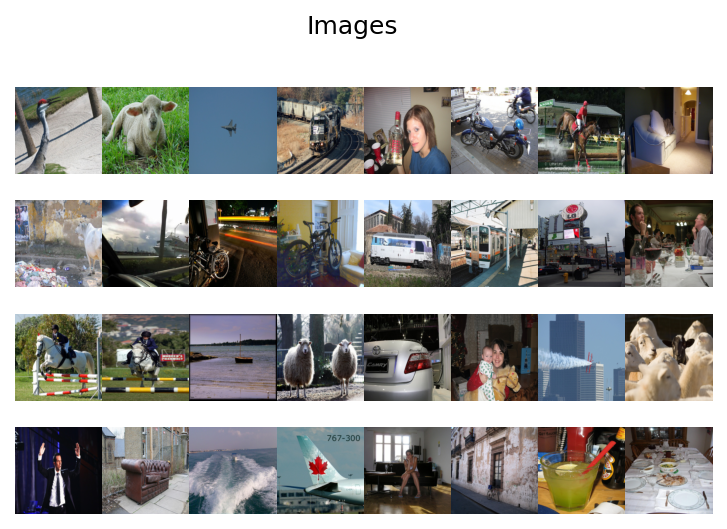

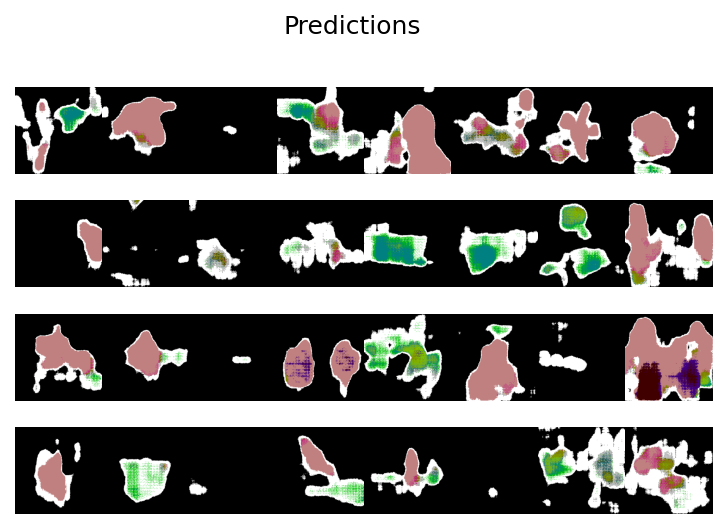

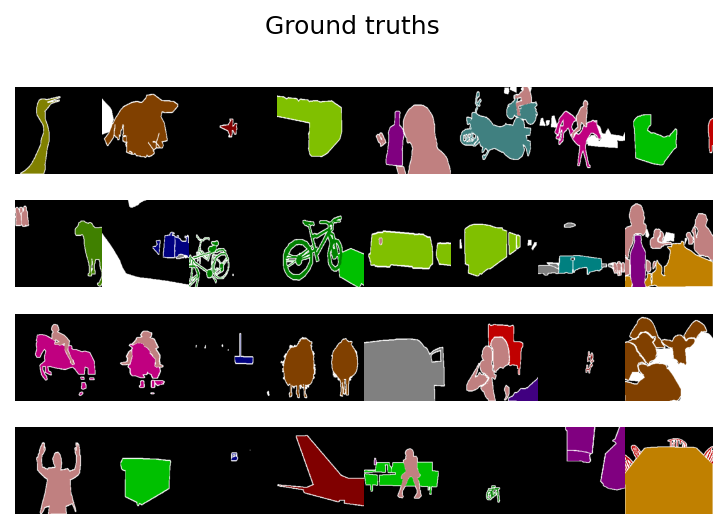

In [ ]:
criterion = nn.CrossEntropyLoss()

# specifying the network

network = torchvision.models.vgg16_bn(pretrained=True)


# network = smp.Unet('resnet34', encoder_weights='imagenet', classes=22)

network = FCN32(network, 22)
network.to(device)

# specifying optimizer
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
network
save_path = 'saves/unet-voc'

# Creating saving directory
os.makedirs(save_path, exist_ok=True)

callbacks = [
    # Save the latest weights to be able to continue the optimization at the end for more epochs.
    ModelCheckpoint(os.path.join(save_path, 'last_weights.ckpt')),
    # Save the weights in a new file when the current model is better than all previous models.
    ModelCheckpoint(
        os.path.join(save_path, 'best_weight.ckpt'),
        save_best_only=True,
        restore_best=True,
        verbose=True,
    ),
    # Save the losses for each epoch in a TSV.
    CSVLogger(os.path.join(save_path, 'log.tsv'), separator='\t'),
]
model = Model(
    network,
    optimizer,
    criterion,
    batch_metrics=['accuracy'],
    epoch_metrics=['f1', torchmetrics.JaccardIndex(num_classes=22, task="multiclass")],
    device=device,
)

# Train
_ = model.fit_generator(train_loader, valid_loader, epochs=num_epochs, callbacks=callbacks)
loss, (acc, f1, jaccard) = model.evaluate_generator(test_loader)
inputs, ground_truths = next(iter(test_loader))
outputs = model.predict_on_batch(inputs)
outputs = outputs.argmax(1)

outputs = replace_tensor_value_(outputs, 21, 255)
ground_truths = replace_tensor_value_(ground_truths, 21, 255)

plt_inputs = np.clip(inputs.numpy().transpose((0, 2, 3, 1)) * imagenet_std + imagenet_mean, 0, 1)
fig = plot_images(plt_inputs)
fig.suptitle("Images")

pil_outputs = [array1d_to_pil_image(out) for out in outputs]
fig = plot_images(pil_outputs)
fig.suptitle("Predictions")

pil_ground_truths = [array1d_to_pil_image(gt) for gt in ground_truths.numpy()]
fig = plot_images(pil_ground_truths)
_ = fig.suptitle("Ground truths")

## Write-up (5 pt)
* Describe the properties of segmentation model
* Describe the evaluation metric (IoU) for segmentation model 

* Properties of segmentation model: The segmentation model uses VGG 16 network. VGG16 is used with batch normalization. Then we implament a FCN32. It was observed that the VGG16 yields better results when combined with FCN32.

* The encoder extracts features from the image through filters. The decoder is responsible for generating the final output which is usually a segmentation mask containing the outline of the object.
* IoU is the area of overlap between the predicted segmentation and the ground truth divided by the area of union between the predicted segmentation and the ground truth


## Hint
* Refer to original paper FCNet : https://arxiv.org/abs/1411.4038
* Figures for FCNet Structure: https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1
* PyTorch Tutorial for Image semgnetation: https://towardsdatascience.com/train-neural-net-for-semantic-segmentation-with-pytorch-in-50-lines-of-code-830c71a6544f

# Part 4: Text2Img Generation (10 Points)

We have provided link to 'DALL.E' mini model to generate images from a text prompt in an interactive way.

https://colab.research.google.com/github/borisdayma/dalle-mini/blob/main/tools/inference/inference_pipeline.ipynb#scrollTo=118UKH5bWCGa

### Write-up (10 pts)
1. Try different prompts (as per your understanding) to reveal biases encoded by model (for example, birds always exist in the similar surroundings like trees).

2. By inputting creative text prompts, you should report the failure cases in your writeup i.e. when model doesn't quite understand the semantics of text prompt (for example, in case of long and complex sentences).

Text(0.5, 1.0, 'Failure')

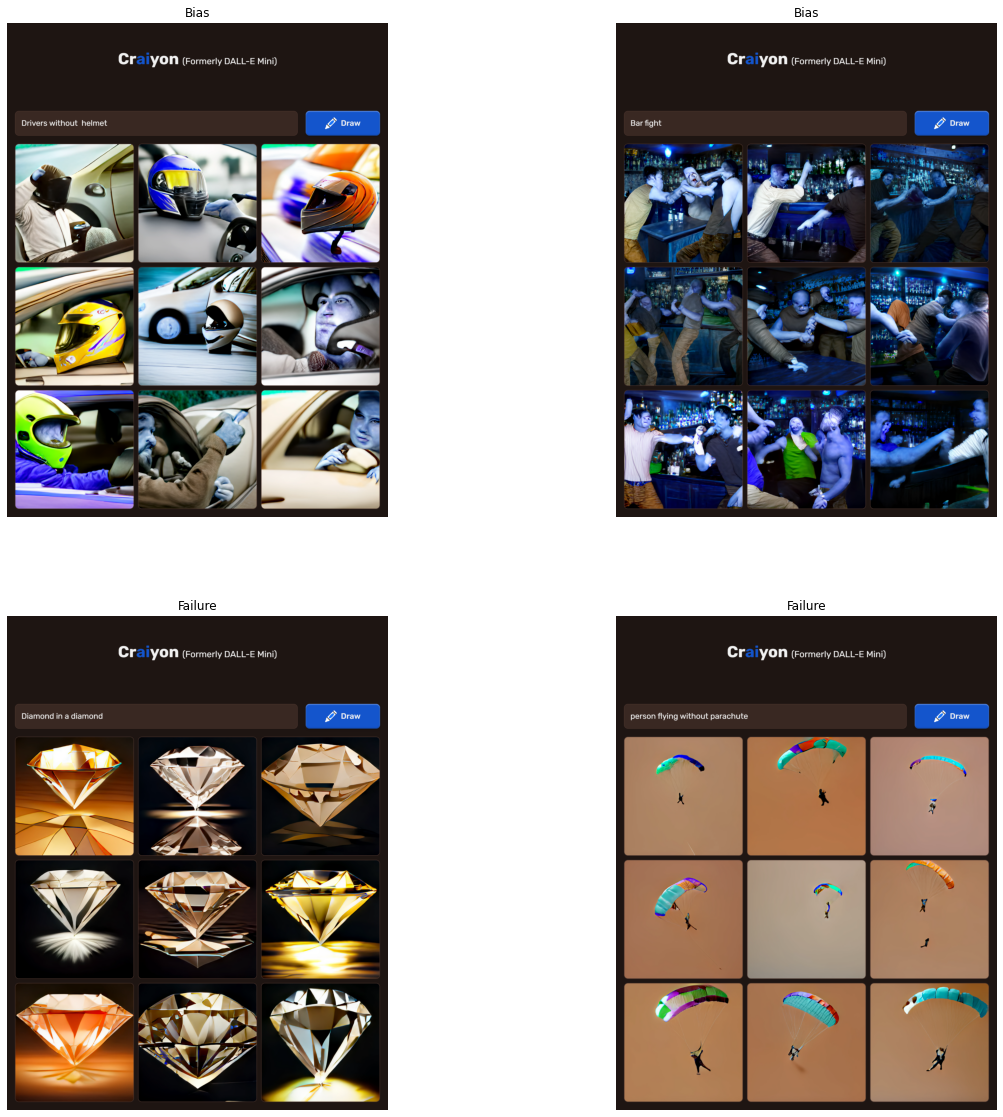

In [75]:
# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(20,20))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('/content/craiyon_005711_Drivers_without__helmet.png')
Image2 = cv2.imread('/content/craiyon_010245_Bar_fight_.png')
Image3 = cv2.imread('/content/craiyon_011408_Diamond_in_a_diamond.png')
Image4 = cv2.imread('/content/craiyon_011705_person_flying_without_parachute.png')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Bias")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Bias")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Failure")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Failure")


The model is biased towards male gender.
The model fails to generate diamond inside a diamond because it is rare in nature.
Furthermore, model genrated a person flying with parachute despite asking for without parachute.

### Extra Credit (15 pts)

In this part, you would compare the results of two recent text-to-image generation models: DALL E (https://www.craiyon.com) v/s Stable Diffusion (https://huggingface.co/spaces/stabilityai/stable-diffusion). 

1. You can compare the results of two models in terms of: image quality, diversity of background, grounding in the text prompt and so on.

2. Similar to the main write-up, you are required to report 2 biases and 2 failure cases: i) where these models are unfairly biased, and ii) cases where one model is able to rectify the mistakes (of not understanding the semantics of text prompt) made by other one.



Note: You shouldn't copy/past examples from internet, and any event of exact matching for any of the text prompts would be penalized.

Text(0.5, 1.0, 'stable diffusion fails')

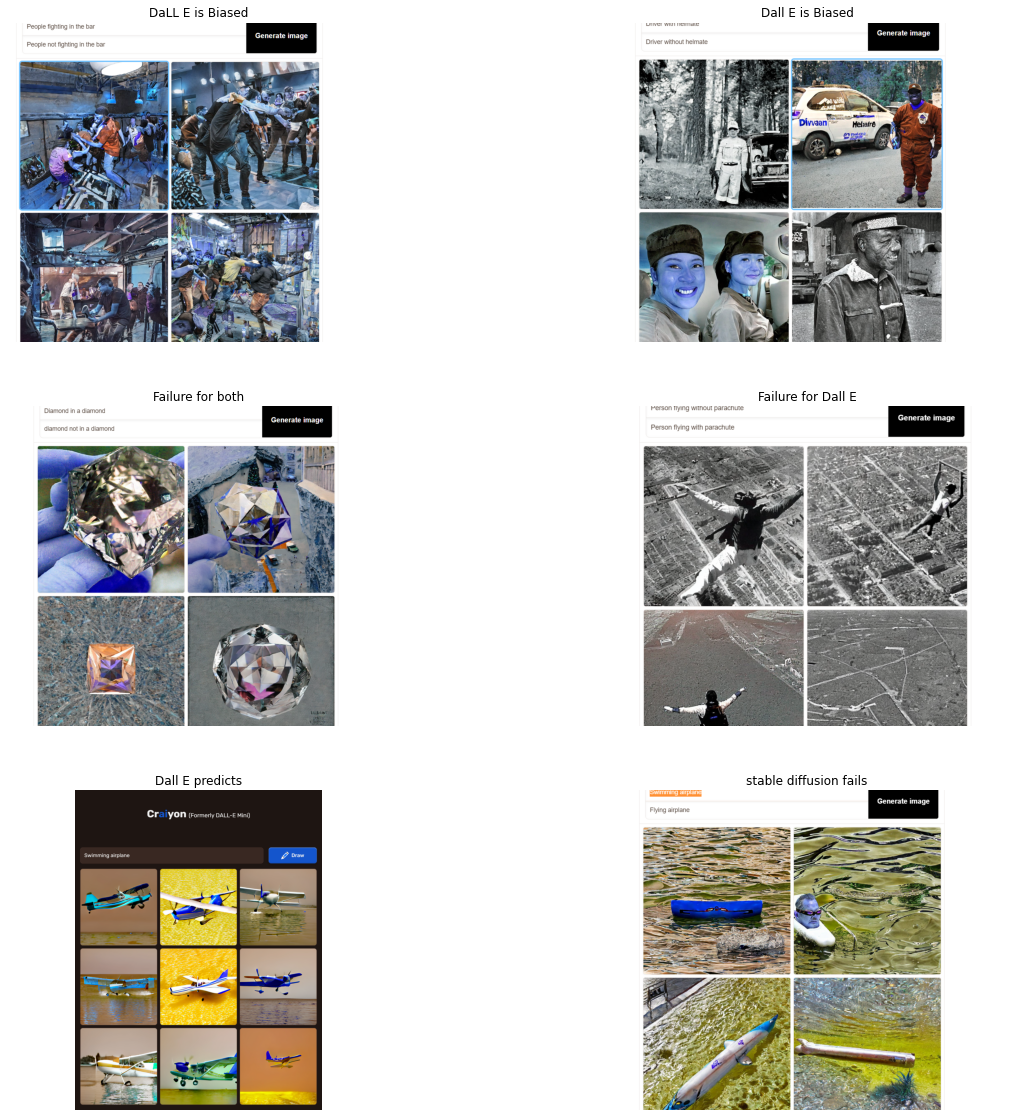

In [83]:
# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(20,20))

# setting values to rows and column variables
rows = 3
columns = 2

# reading images
Image1 = cv2.imread('/content/Bar_fight.png')
Image2 = cv2.imread('/content/Driver.png')
Image3 = cv2.imread('/content/Diamond in a diamond.png')
Image4 = cv2.imread('/content/Person_fly.png')
Image5= cv2.imread('/content/craiyon_014021_Swimming_airplane.png')
Image6= cv2.imread('/content/airplane.png')


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("DaLL E is Biased")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Dall E is Biased")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Failure for both")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Failure for Dall E")

fig.add_subplot(rows, columns, 5)

# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("Dall E predicts")
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("stable diffusion fails")

Stable diffusion is slightly better than Dall E beacuse it takes both the negative and positive aspects. Furthermore, it is more diverse than the Dall E